<a href="https://colab.research.google.com/github/hereiskunalverma/Keras-Datasets-Implementation/blob/master/MNIST%20digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# It will be very kind of you if you modify the plot predicted images as accordance with the following -- 
1. correct prediction should be above the image
2. incorrect prediction should be below the image
3. predictions bar showing the probabilities of other predictions

In [20]:
# Importing the libraries and packages
import tensorflow as tf
# import Tensorflow Dataset and keras dataset
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import keras.datasets as kd
import keras

# Helper libraries
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
from keras.utils.np_utils import to_categorical
# Getting the dataset
# The dataset will return tuple (x_train, y_train), (x_test, y_test) check it out - https://keras.io/api/datasets/mnist/
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [22]:
print("X_train shape --> ", X_train.shape)
print("y_train shape --> ", y_train.shape)
print("X_test shape --> ", X_test.shape)
print("y_test shape -->", y_test.shape)

X_train shape -->  (60000, 28, 28)
y_train shape -->  (60000,)
X_test shape -->  (10000, 28, 28)
y_test shape --> (10000,)


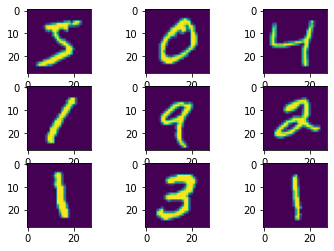

In [23]:
# plot first 9 images
from matplotlib import pyplot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i])
# show the figure
pyplot.show()

In [24]:
# reshaping X_train and X_test
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [25]:
# making model

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)),
                             tf.keras.layers.MaxPooling2D(2,2),

                             tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
                             tf.keras.layers.MaxPooling2D(2, 2),

                             tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
                             tf.keras.layers.MaxPooling2D(2, 2),

                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )

In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print('\nReached 99% accuracy so cancelling training!')
      self.model.stop_training=True
callbacks = myCallback()

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[callbacks])

Epoch 1/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2190 - accuracy: 0.9551 - val_loss: 0.0557 - val_accuracy: 0.9815
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0560 - accuracy: 0.9825 - val_loss: 0.0654 - val_accuracy: 0.9796
Epoch 3/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0444 - accuracy: 0.9869 - val_loss: 0.0358 - val_accuracy: 0.9875
Epoch 4/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0398 - accuracy: 0.9880 - val_loss: 0.0722 - val_accuracy: 0.9800
Epoch 5/50
1868/1875 [============================>.] - ETA: 0s - loss: 0.0316 - accuracy: 0.9906
Reached 98% accuracy so cancelling training!
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0316 - accuracy: 0.9906 - val_loss: 0.0496 - val_accuracy: 0.9858


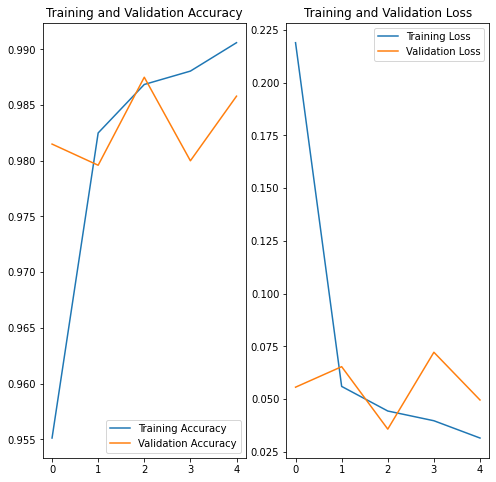

In [29]:
EPOCHS = 5 # obtained from early stopping i.e., myCallback()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0496 - accuracy: 0.9858


[0.04961486905813217, 0.98580002784729]

In [53]:
predicted_lab = model.predict(X_test)
predicted_lab = np.round(predicted_lab)
y_test_lis = y_test.tolist()
predicted_lab_lis = predicted_lab.tolist()
class_names= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

print("Labels:                       ",      y_test_lis)
print("Predicted Labels:             ", predicted_lab_lis)
print("Length of Labels           -->",len(y_test_lis))
print("Length of Predicted Labels -->",len(predicted_lab_lis))

Labels:                        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0

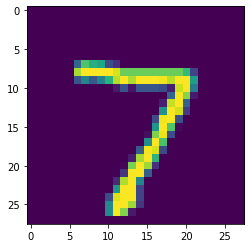

In [48]:
plt.imshow(X_test[0].squeeze())

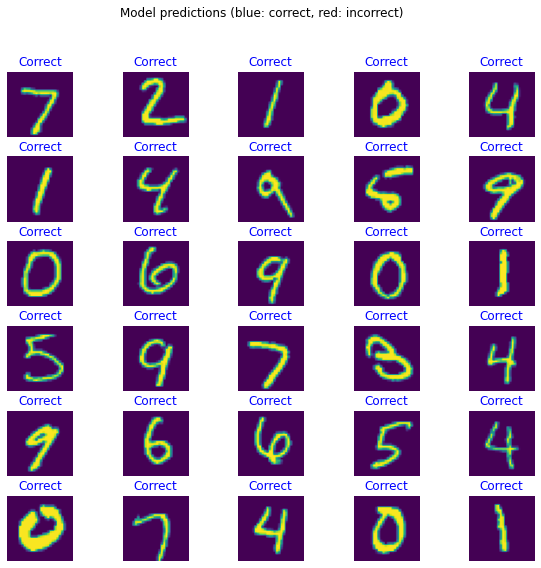

In [61]:
plt.figure(figsize=(10,9))
images = 30 # no of predicted to show
for n in range(images):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_lab_lis[n] == y_test_lis[n] else "red"
  if color=="blue":
    plt.title("Correct", color=color)
  else:

    plt.title("Wrong", color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")


In [90]:
# Testing the model with own images

from google.colab import files
from keras.preprocessing import image
from PIL import Image

img_size = 28 # same as input size
uploaded = files.upload()
for fn in uploaded.keys():
  
  # predicting images
  path = fn
  img = image.load_img(path, grayscale=True, target_size=(img_size, img_size))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  print(x.shape)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving rock-n-roll-monkey-FTfjMijq-Ws-unsplash.jpg to rock-n-roll-monkey-FTfjMijq-Ws-unsplash (1).jpg


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(1, 28, 28, 1)
rock-n-roll-monkey-FTfjMijq-Ws-unsplash.jpg
[[0.03119223 0.05264986 0.01441102 0.5735887  0.00605918 0.17829068
  0.04158449 0.01092015 0.01672584 0.07457791]]


(28, 28, 1)
(1, 28, 28, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


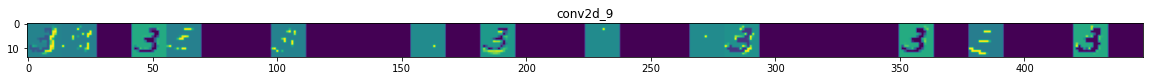

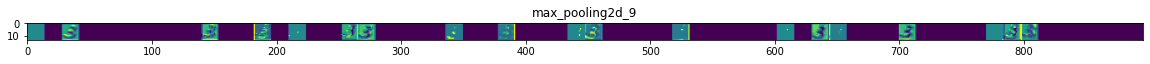

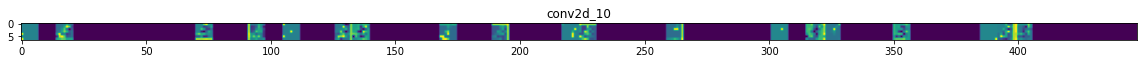

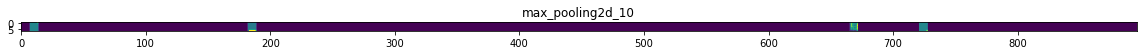

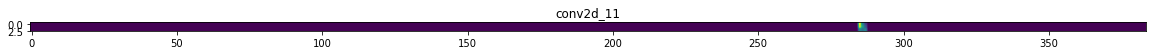

In [86]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image from our training set
img_vis = random.choice(X_train) # Numpy array with shape (28, 28, 1)
print(img_vis.shape)


x   = img_vis.reshape((1,) + img_vis.shape)                   # Numpy array with shape (1, 28, 28,  3)
print(x.shape)

# Rescale by 1/255
x = x/255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

